## Student Perforemance Prediction  with selecting important feature 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("C://Users//DISHA_COMPUTER//Documents//student performance dataset ....csv")

In [4]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [5]:
data.drop(["GPA","StudentID","Sports","Gender","Extracurricular","Music","Volunteering"	],axis=1,inplace=True)


In [6]:
from sklearn.model_selection import train_test_split
X=data[['Age','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport',"Ethnicity"]]
Y=data["GradeClass"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((1913, 7), (479, 7), (1913,), (479,))

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE( random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
unique, counts = np.unique(Y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 974, 1: 974, 2: 974, 3: 974, 4: 974}


## Multinomial Naive Bayes 

In [8]:
from sklearn.naive_bayes import MultinomialNB
Mnb=MultinomialNB()
Mnb.fit(X_train_resampled,Y_train_resampled)
MNy_pred=Mnb.predict(X_test)

* Accuracy

In [9]:

from sklearn.metrics import accuracy_score
accur_score=accuracy_score(Y_test,MNy_pred)
print("Accuracy:",accur_score)

Accuracy: 0.5949895615866388


* precision, recall,f1score

In [61]:
from sklearn.metrics import precision_recall_fscore_support
micro_precisionMN, micro_recallMN, micro_f1MN, _ = precision_recall_fscore_support(Y_test, MNy_pred, average='micro')
print(f'micro_precision_MN:{micro_precisionMN:.2f}')
print(f'micro_recallMN:{micro_recallMN:.2f}')
print(f'micro_f1scoreMN:{micro_f1MN:.2f}')

micro_precision_MN:0.59
micro_recallMN:0.59
micro_f1scoreMN:0.59


*  Classification report


In [15]:

from sklearn.metrics import classification_report
reportmny=classification_report(Y_test,MNy_pred)
print(reportmny)

              precision    recall  f1-score   support

           0       0.15      0.36      0.21        22
           1       0.40      0.37      0.38        49
           2       0.53      0.34      0.41        85
           3       0.38      0.45      0.41        86
           4       0.86      0.81      0.83       237

    accuracy                           0.59       479
   macro avg       0.46      0.47      0.45       479
weighted avg       0.63      0.59      0.61       479



## KNN 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_resampled,Y_train_resampled)
ky_pred=classifier.predict(X_test)


*  Accuracy

In [17]:
from sklearn.metrics import accuracy_score
knn_accur_score=accuracy_score(Y_test,ky_pred)
print(f"Accuracy:{knn_accur_score:.2f}")

Accuracy:0.52


* precision ,recall ,f1- score

In [18]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_knn, micro_recall_knn, micro_f1_knn, _ = precision_recall_fscore_support(Y_test, ky_pred, average='micro')
print(f'micro_precision_knn:{micro_precision_knn:.2f}')
print(f'micro_recall_knn: {micro_recall_knn:.2f}')
print(f'micro_f1score_knn: {micro_f1_knn:.2f}')

micro_precision_knn:0.52
micro_recall_knn: 0.52
micro_f1score_knn: 0.52


*  Classification report

In [19]:
from sklearn.metrics import classification_report
reportky=classification_report(Y_test,ky_pred)
print(reportky)

              precision    recall  f1-score   support

           0       0.16      0.36      0.22        22
           1       0.23      0.39      0.29        49
           2       0.40      0.35      0.38        85
           3       0.36      0.37      0.36        86
           4       0.88      0.68      0.77       237

    accuracy                           0.52       479
   macro avg       0.41      0.43      0.40       479
weighted avg       0.60      0.52      0.55       479



## Decision Tree 

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled,Y_train_resampled)
clf_pred=clf.predict(X_test)

* Accuracy 

In [21]:
acc=accuracy_score(Y_test,clf_pred)
acc

0.5156576200417536

In [24]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_dt, micro_recall_dt, micro_f1_dt, _ = precision_recall_fscore_support(Y_test, clf_pred, average='micro')
print("micro_precision_dt:",micro_precision_dt)
print("micro_recall_dt:",micro_recall_dt)
print("micro_f1score_dt:",micro_f1_dt)

micro_precision_dt: 0.5156576200417536
micro_recall_dt: 0.5156576200417536
micro_f1score_dt: 0.5156576200417536


* Classification report

In [25]:
# Classification report
from sklearn.metrics import classification_report
reportclfD=classification_report(Y_test,clf_pred)
print(reportclfD)

              precision    recall  f1-score   support

           0       0.17      0.32      0.23        22
           1       0.22      0.33      0.26        49
           2       0.43      0.41      0.42        85
           3       0.40      0.47      0.43        86
           4       0.81      0.63      0.71       237

    accuracy                           0.52       479
   macro avg       0.41      0.43      0.41       479
weighted avg       0.58      0.52      0.54       479



## Support vector machine 

In [26]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train_resampled,Y_train_resampled)
svmy_pred=model.predict(X_test)


* Accuracy

In [27]:

from sklearn.metrics import accuracy_score
accursvm_score=accuracy_score(Y_test,svmy_pred)
print("Accuracy:",accursvm_score)

Accuracy: 0.6701461377870563


* Classification report

In [28]:

from sklearn.metrics import classification_report
reportsvmy=classification_report(Y_test,svmy_pred)
print(reportsvmy)

              precision    recall  f1-score   support

           0       0.33      0.32      0.33        22
           1       0.43      0.45      0.44        49
           2       0.59      0.51      0.54        85
           3       0.45      0.66      0.54        86
           4       0.92      0.81      0.86       237

    accuracy                           0.67       479
   macro avg       0.55      0.55      0.54       479
weighted avg       0.70      0.67      0.68       479



In [29]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_svm, micro_recall_svm, micro_f1_svm, _ = precision_recall_fscore_support(Y_test, svmy_pred, average='micro')
print("micro_precision_svm:",micro_precision_svm)
print("micro_recall_svm:",micro_recall_svm)
print("micro_f1score_svm:",micro_f1_svm)

micro_precision_svm: 0.6701461377870563
micro_recall_svm: 0.6701461377870563
micro_f1score_svm: 0.6701461377870563


##  logistic Regression 

In [30]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression(multi_class='auto',max_iter=1000)
l.fit(X_train_resampled,Y_train_resampled)
lry_pred=l.predict(X_test)

* Accuracy

In [31]:
accurlr_score=accuracy_score(Y_test,lry_pred)
print("Accuracy:",accurlr_score)

Accuracy: 0.5741127348643006


* Classification report


In [32]:
# Classification report
from sklearn.metrics import classification_report
reportlr=classification_report(Y_test,lry_pred)
print(reportlr)

              precision    recall  f1-score   support

           0       0.13      0.36      0.19        22
           1       0.29      0.31      0.30        49
           2       0.48      0.33      0.39        85
           3       0.40      0.44      0.42        86
           4       0.88      0.78      0.83       237

    accuracy                           0.57       479
   macro avg       0.44      0.45      0.43       479
weighted avg       0.63      0.57      0.59       479



In [33]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_lry, micro_recall_lry, micro_f1_lry, _ = precision_recall_fscore_support(Y_test, lry_pred, average='micro')
print("micro_precision_lry:",micro_precision_lry)
print("micro_recall_lry:",micro_recall_lry)
print("micro_f1score_lry:",micro_f1_lry)

micro_precision_lry: 0.5741127348643006
micro_recall_lry: 0.5741127348643006
micro_f1score_lry: 0.5741127348643006


## Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_resampled,Y_train_resampled)
rf_y_pred=rf_model.predict(X_test)


* Accuracy 

In [35]:
accurrf_y_score=accuracy_score(Y_test,rf_y_pred)
print("Accuracy:",accurrf_y_score)

Accuracy: 0.6367432150313153


*  Classification report


In [36]:

from sklearn.metrics import classification_report
reportrf=classification_report(Y_test,rf_y_pred)
print(reportrf)

              precision    recall  f1-score   support

           0       0.29      0.36      0.32        22
           1       0.45      0.51      0.48        49
           2       0.47      0.46      0.46        85
           3       0.44      0.45      0.45        86
           4       0.87      0.82      0.84       237

    accuracy                           0.64       479
   macro avg       0.50      0.52      0.51       479
weighted avg       0.65      0.64      0.64       479



In [37]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_rf, micro_recall_rf, micro_f1_rf, _ = precision_recall_fscore_support(Y_test, rf_y_pred, average='micro')
print("micro_precision_rf:",micro_precision_rf)
print("micro_recall_rf:",micro_recall_rf)
print("micro_f1score_rf:",micro_f1_rf)

micro_precision_rf: 0.6367432150313153
micro_recall_rf: 0.6367432150313153
micro_f1score_rf: 0.6367432150313153


## Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gb_model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=42)
gb_model.fit(X_train_resampled,Y_train_resampled)
gbcy_pred=rf_model.predict(X_test)


* Accuracy

In [40]:
accurgb_y_score=accuracy_score(Y_test,gbcy_pred)
print("Accuracy:",accurgb_y_score)

Accuracy: 0.6367432150313153


*  Classification report

In [41]:
from sklearn.metrics import classification_report
reportgbc=classification_report(Y_test,gbcy_pred)
print(reportgbc)

              precision    recall  f1-score   support

           0       0.29      0.36      0.32        22
           1       0.45      0.51      0.48        49
           2       0.47      0.46      0.46        85
           3       0.44      0.45      0.45        86
           4       0.87      0.82      0.84       237

    accuracy                           0.64       479
   macro avg       0.50      0.52      0.51       479
weighted avg       0.65      0.64      0.64       479



In [42]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_gbc, micro_recall_gbc, micro_f1_gbc, _ = precision_recall_fscore_support(Y_test, gbcy_pred, average='micro')
print("micro_precision_gbc:",micro_precision_gbc)
print("micro_recall_gbc:",micro_recall_gbc)
print("micro_f1score_gbc:",micro_f1_gbc)

micro_precision_gbc: 0.6367432150313153
micro_recall_gbc: 0.6367432150313153
micro_f1score_gbc: 0.6367432150313153


## Bagging Classifier 

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
bagging_clf.fit(X_train_resampled, Y_train_resampled)
ybg_pred = bagging_clf.predict(X_test)

* Accuracy

In [44]:
accuracy = accuracy_score(Y_test, ybg_pred)
print("Accuracy",accuracy)

Accuracy 0.6221294363256785


* Classification report

In [45]:
from sklearn.metrics import classification_report
reportbg=classification_report(Y_test,ybg_pred)
print(reportbg)

              precision    recall  f1-score   support

           0       0.23      0.32      0.27        22
           1       0.37      0.53      0.44        49
           2       0.49      0.42      0.46        85
           3       0.47      0.50      0.49        86
           4       0.87      0.78      0.82       237

    accuracy                           0.62       479
   macro avg       0.49      0.51      0.49       479
weighted avg       0.65      0.62      0.63       479



In [47]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_bg, micro_recall_bg, micro_f1_bg, _ = precision_recall_fscore_support(Y_test, ybg_pred, average='micro')
print("micro_precision_bg:",micro_precision_bg)
print("micro_recall_bg:",micro_recall_bg)
print("micro_f1score_bg:",micro_f1_bg)

micro_precision_bg: 0.6221294363256785
micro_recall_bg: 0.6221294363256785
micro_f1score_bg: 0.6221294363256785


## Linear Discriminant Analysis

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ld=LDA()
ld.fit(X_train_resampled, Y_train_resampled)
y_predld=ld.predict(X_test)

* Accuracy 

In [49]:
accuracy = accuracy_score(Y_test, y_predld)
accuracy 

0.569937369519833

* Classification report

In [50]:
from sklearn.metrics import classification_report
reportldy=classification_report(Y_test,y_predld)
print(reportldy)

              precision    recall  f1-score   support

           0       0.13      0.36      0.19        22
           1       0.30      0.31      0.30        49
           2       0.41      0.29      0.34        85
           3       0.40      0.42      0.41        86
           4       0.88      0.80      0.84       237

    accuracy                           0.57       479
   macro avg       0.42      0.44      0.42       479
weighted avg       0.62      0.57      0.59       479



In [56]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_ld, micro_recall_ld, micro_f1_ld, _ = precision_recall_fscore_support(Y_test, y_predld, average='micro')
print("micro_precision_ld:",micro_precision_ld)
print("micro_recall_ld:",micro_recall_ld)
print("micro_f1score_ld:",micro_f1_ld)

micro_precision_ld: 0.569937369519833
micro_recall_ld: 0.569937369519833
micro_f1score_ld: 0.569937369519833


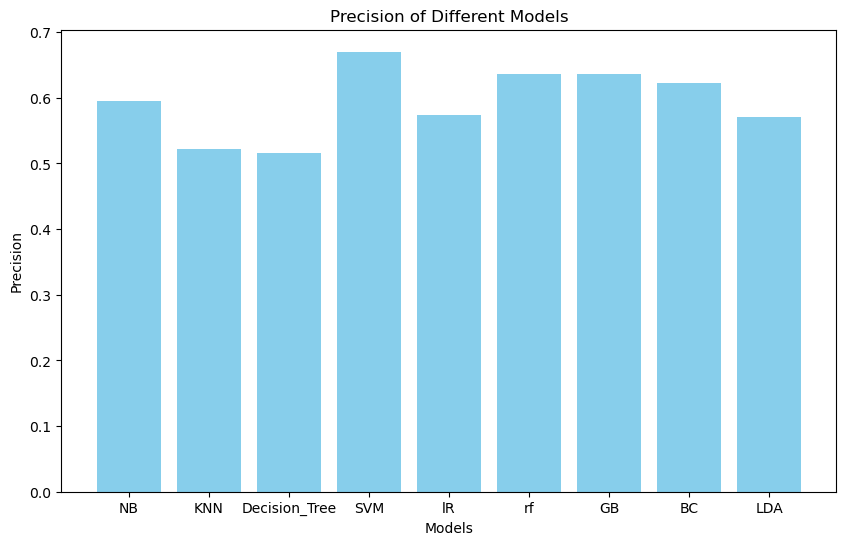

In [57]:
import matplotlib.pyplot as plt
import numpy as np
models = ["NB", "KNN", 'Decision_Tree', "SVM", "lR", 
          "rf", "GB", "BC", 
          "LDA"]
precision = [micro_precisionMN , micro_precision_knn,micro_precision_dt,micro_precision_svm, micro_precision_lry,micro_precision_rf,micro_precision_gbc, micro_precision_bg,micro_precision_ld]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color='skyblue')  # Create the bar plot
plt.xlabel('Models')  # Label for x-axis
plt.ylabel('Precision')  # Label for y-axis
plt.title('Precision of Different Models')  # Title for the plot

plt.show()

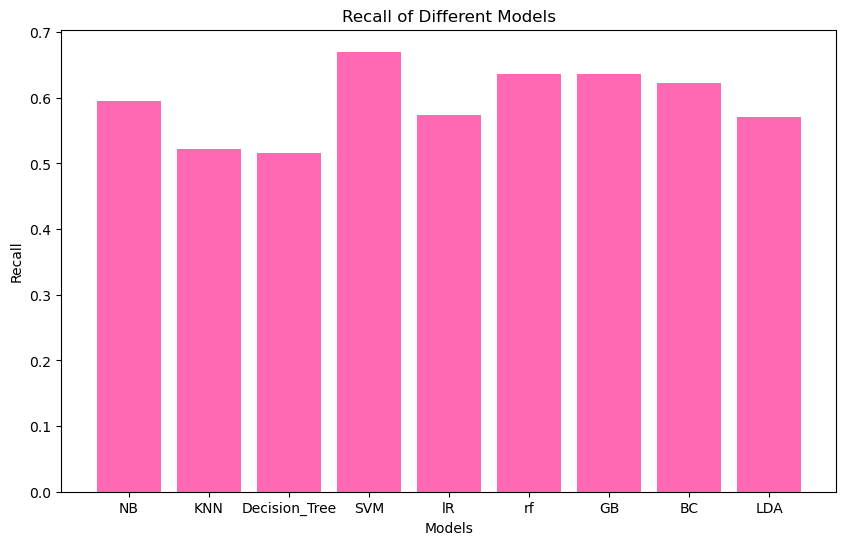

In [58]:
import matplotlib.pyplot as plt
import numpy as np
models = ["NB", "KNN", 'Decision_Tree', "SVM", "lR", 
          "rf", "GB", "BC", 
          "LDA"]
precision = [micro_recallMN , micro_recall_knn,micro_recall_dt,micro_recall_svm, micro_recall_lry,micro_recall_rf,micro_recall_gbc, micro_recall_bg,micro_recall_ld]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color='hotpink')  # Create the bar plot
plt.xlabel('Models')  # Label for x-axis
plt.ylabel('Recall')  # Label for y-axis
plt.title('Recall of Different Models')  # Title for the plot
plt.show()

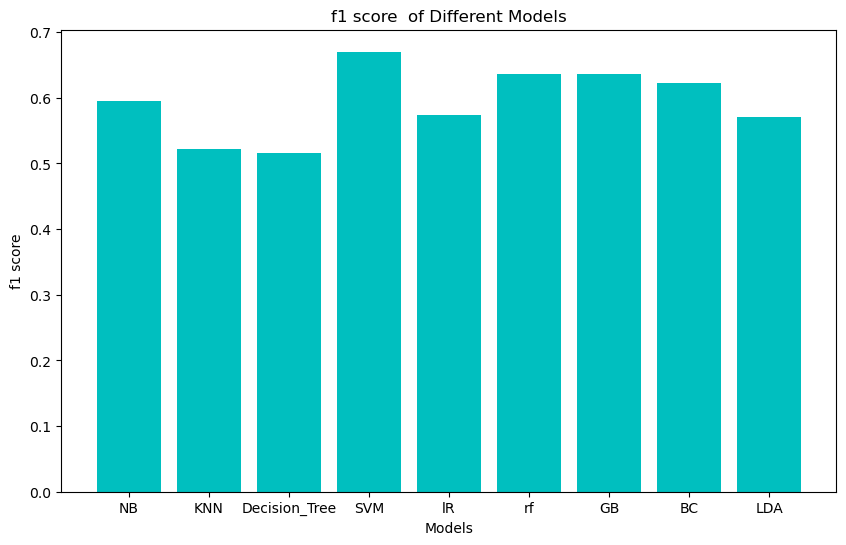

In [59]:
import matplotlib.pyplot as plt
import numpy as np
models = ["NB", "KNN", 'Decision_Tree', "SVM", "lR", 
          "rf", "GB", "BC", 
          "LDA"]
precision = [micro_f1MN , micro_f1_knn,micro_f1_dt,micro_f1_svm, micro_f1_lry,micro_f1_rf,micro_f1_gbc, micro_f1_bg,micro_f1_ld]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color='c')  # Create the bar plot
plt.xlabel('Models')  # Label for x-axis
plt.ylabel('f1 score')  # Label for y-axis
plt.title('f1 score  of Different Models')  # Title for the plot
plt.show()


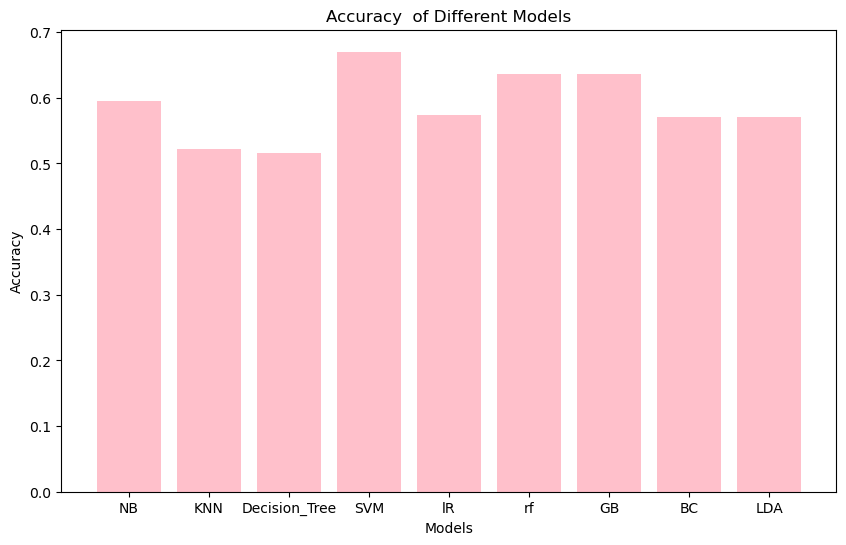

In [60]:
import matplotlib.pyplot as plt
import numpy as np
models = ["NB", "KNN", 'Decision_Tree', "SVM", "lR", 
          "rf", "GB", "BC", 
          "LDA"]
precision = [accur_score ,knn_accur_score,acc,accursvm_score, accurlr_score,accurrf_y_score,accurgb_y_score,accuracy ,accuracy]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color='pink')  # Create the bar plot
plt.xlabel('Models')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('Accuracy  of Different Models')  # Title for the plot
plt.show()

## From the above graphs we conclude that Super vector machine model  gives better result than other models